# Chapter 5: Convex Optimization #

## Code segment 5.1  
Critical point calculation in Section 5.2

In [2]:
#Code Segment 5.1
##Optimize Idee's utility function
import numpy as np
import scipy.optimize as scpo

def util(params):
    w,b=params
#Want to maximize utility, so minimize -disutility
    ufunc=(5*w-w**2)*(10*b-b**2)
    return(-ufunc)

#initial guess for parameters
init_params=[1.,0.]
#Run the minimization.
results = scpo.minimize(util,init_params,method='CG')
wealth, friends = results.x
print("Critical point wealth = %.1f, friends = %.1f" % (wealth, friends))
print("Objective function at critical point: %.2f" % results.fun)

Critical point wealth = 2.5, friends = 5.0
Objective function at critical point: -156.25


## Code segment 5.2  
Figure 5.1 in Section 5.2

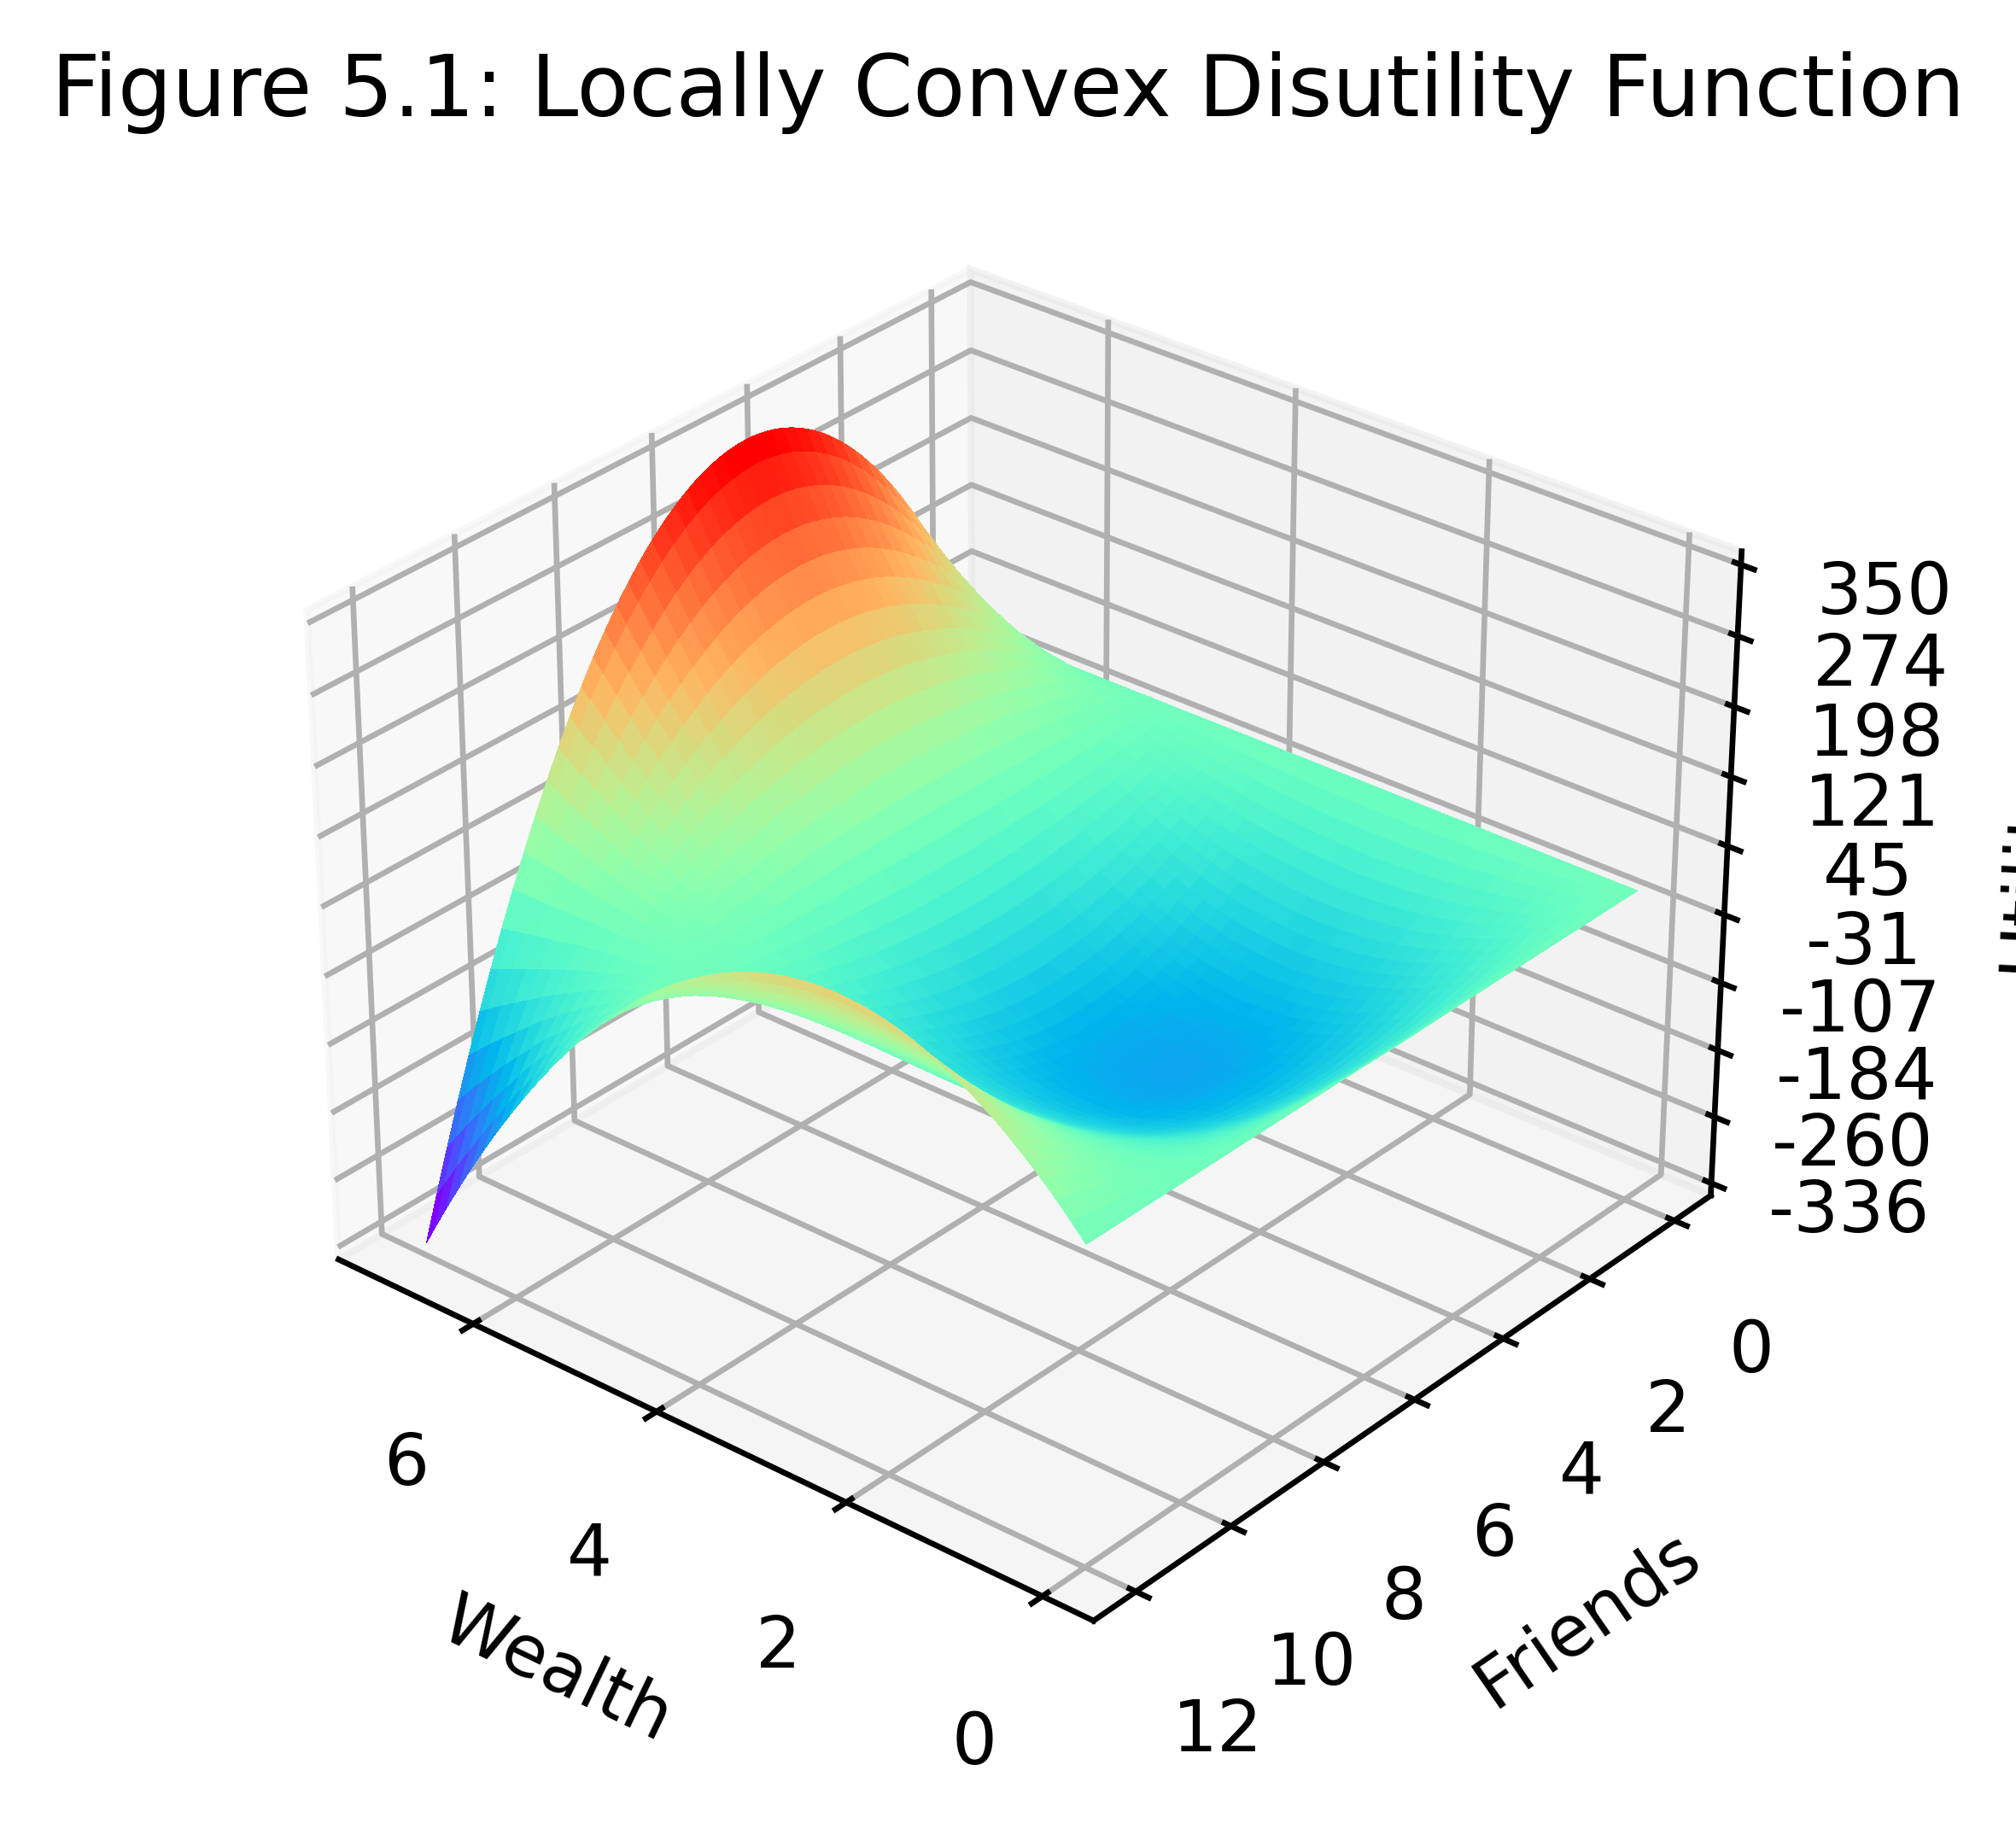

In [3]:
#Code Segment 5.2
#Graph Idee's disutility function

import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as spst
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
plt.rcParams['figure.dpi']= 300

#draw surface
fig, ax = plt.subplots(subplot_kw={"projection": "3d"},dpi=300)

# Make data.
X = np.arange(0.,7.05,.05)
Y = np.arange(0.,12.05,.05)
X, Y = np.meshgrid(X, Y)
Z = util([X,Y])

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.rainbow,
    linewidth=0, antialiased=False)

# Customize the z axis.
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax.view_init(ax.elev, ax.azim-170)

#Label axes
ax.set_xlabel('Wealth')
ax.set_ylabel('Friends')
ax.set_zlabel('Utility')

s_title="Figure 5.1: Locally Convex Disutility Function"
plt.title(s_title)

plt.show();

## Code segment 5.3  
Gradient Descent method in Section 5.3.1

In [4]:
#Code Segment 5.3
#Gradient descent method for log(sum(exp(ai'x+bi))) objective function

#Problem parameters
n=2; m=3   #variables, components of sum
a=np.zeros((m,n))
a[0]=[1,3]
a[1]=[1,-3]
a[2]=[-1,0]
b=[-.1,-.1,-.1]
def objfunc(x):
    #This objective function is reasonably scaled so not using order_magnitude adjustment
    sumexps=sum([np.exp(np.matmul(a[i],x)+b[i]) for i in range(m)])
    return(np.log(sumexps))

#gradient of this objective function
def gradfunc(x):
    gradvec=np.zeros(n)
    sumexps=0.
    for i in range(m):
        this_exp=np.exp(np.matmul(a[i],x)+b[i])
        gradvec+=this_exp*a[i]
        sumexps+=this_exp
    return(gradvec/sumexps)

def gradientmethod(xinit,objfunc,gradfunc,talkative):
    global order_magnitude    #variable used to size objective function around 1
#Gradient descent method
    #Starting point
    x=xinit
    iteration=0
    #initialize order of magnitude - objfunc uses this to scale objective
    order_magnitude=0.
    
    if talkative:
        print("Initial point:",x[0])
        print("Objective function at initial point:",objfunc(x[0]))
        print("Gradient at initial point:",gradfunc(x[0]))
    
    #Parameters for backtracking
    alpha=.25
    beta=.75
    epsilon=10**(-8)
    maxiter=500

    #Iterate as long as necessary
    while True:
        deltax=-gradfunc(x[iteration])
        delta=1

        #Backtracking
        current_obj=objfunc(x[iteration])
        grad_squared=np.matmul(deltax,deltax)
        if talkative: print(iteration," obj:",current_obj, \
                " grad^2:",grad_squared)
        if grad_squared < epsilon:
            break     #Done

        while True:
            y=x[iteration]+delta*deltax
            new_obj=objfunc(y)
            if new_obj > current_obj-delta*alpha*grad_squared:
                delta*=beta
            else:
                break   #Backtracking done

        if talkative: print("Delta from backtracking:",delta)
        x.append(y)
        iteration+=1
        if iteration > maxiter:
            break
    return(x)

#Starting point
xinit=[[1]*n]
x=gradientmethod(xinit,objfunc,gradfunc,True)

print("optimal x",x[-1])
print("optimal objective",objfunc(x[-1]))
print("gradient",gradfunc(x[-1]))

Initial point: [1, 1]
Objective function at initial point: 3.909174484591735
Gradient at initial point: [0.98664717 2.96523407]
0  obj: 3.909174484591735  grad^2: 9.766085755759542
Delta from backtracking: 0.5625
1  obj: 2.4198033815320383  grad^2: 8.332277507974275
Delta from backtracking: 0.31640625
2  obj: 1.191342005793633  grad^2: 1.8085316901136013
Delta from backtracking: 0.2373046875
3  obj: 1.0371266525499625  grad^2: 0.4614786912439451
Delta from backtracking: 0.31640625
4  obj: 0.993811097175349  grad^2: 0.3000411969185905
Delta from backtracking: 0.31640625
5  obj: 0.9663931514449047  grad^2: 0.15240881861624558
Delta from backtracking: 0.31640625
6  obj: 0.9513765394485699  grad^2: 0.062343467491375974
Delta from backtracking: 0.31640625
7  obj: 0.9444446348940022  grad^2: 0.021872767145336654
Delta from backtracking: 0.31640625
8  obj: 0.9416102287070496  grad^2: 0.0071421499562395055
Delta from backtracking: 0.421875
9  obj: 0.9406337475243942  grad^2: 0.0050135475634115

## Code segment 5.4  
Newton's Method in Section 5.3.2

In [5]:
#Code Segment 5.4
# Use Newton's method to optimize the previous function

def hessfunc(x,epsilon):
    #Hessian function computed by differencing gradient
    hessmatrix=np.zeros((n,n))
    for i in range(n):
        deltai=np.zeros(n)
        deltai[i]=epsilon
        xx=np.array(x)
        hessmatrix[i]=(gradfunc(xx+deltai)-gradfunc(xx))/epsilon
    return(hessmatrix)

def newtonmethod(xinit,objfunc,gradfunc,hessfunc):
    global order_magnitude    #variable used to size objective function around 1

#Run Newton's Method with calls to objfunc, gradfunc, and hessfunc
    #Starting point
    x=xinit
    print(x[0])
    iteration=0
    #initialize order of magnitude - objfunc uses this to scale objective
    order_magnitude=0.

    #Parameters for backtracking
    alpha=.25
    beta=.75
    epsilon=10**(-8)
    maxiter=500

    print("Objective function at initial point:",objfunc(x[0]))
    print("Gradient at initial point:",gradfunc(x[0]))
    print("Hessian at initial point:",hessfunc(x[0],epsilon))
    print("Inverse Hessian initial:",np.linalg.inv(hessfunc(x[0],epsilon)))

    #Iterate as long as necessary
    while True:
        deltax=-np.matmul(np.linalg.inv(hessfunc(x[iteration],epsilon)), \
                          gradfunc(x[iteration]))
        delta=1

        #Backtracking
        current_obj=objfunc(x[iteration])
        grad_hessinv_grad=np.matmul(gradfunc(x[iteration]),deltax)
        print(iteration," obj:",current_obj, \
              " grad_hessinv_grad:",-grad_hessinv_grad)
        if -grad_hessinv_grad < epsilon:
            break     #Done

        while True:
            y=x[iteration]+delta*deltax
            new_obj=objfunc(y)
            if new_obj > current_obj+delta*alpha*grad_hessinv_grad:
                delta*=beta
            else:
                break   #Backtracking done

        y=x[iteration]+delta*deltax
        print(delta,y)
        x.append(y)
        iteration+=1
        if iteration > maxiter:
            break
    #x has the x vector for each iteration, with the last one
    #being the optimal (or last if ran out of iterations)
    return(x) 
            
xinit=[[1]*n]
x=newtonmethod(xinit,objfunc,gradfunc,hessfunc)
    
print("optimal x:",x[-1])
print("iterations:",len(x)-1)
print("optimal objective:",objfunc(x[-1]))
print("gradient:",gradfunc(x[-1]))
print("Hessian",hessfunc(x[-1],10**(-8)))


[1, 1]
Objective function at initial point: 3.909174484591735
Gradient at initial point: [0.98664717 2.96523407]
Hessian at initial point: [[0.02652737 0.03959433]
 [0.03959425 0.14729915]]
Inverse Hessian initial: [[ 62.95504778 -16.92245195]
 [-16.92241874  11.33768788]]
0  obj: 3.909174484591735  grad_hessinv_grad: 61.95501868188109
0.1001129150390625 [-0.19488658 -0.69415497]
1  obj: 1.9695284290060515  grad_hessinv_grad: 5.531910734319999
0.2373046875 [0.58173277 0.05768084]
2  obj: 1.3329174288346173  grad_hessinv_grad: 1.171723282305864
0.75 [-0.60126378  0.03222058]
3  obj: 0.9735629366605393  grad_hessinv_grad: 0.07127260377393035
1 [-0.33182971 -0.01084373]
4  obj: 0.940097915531959  grad_hessinv_grad: 0.000746768457477862
1 [-3.46318867e-01 -1.52789721e-04]
5  obj: 0.9397208558207234  grad_hessinv_grad: 1.6993486695737332e-07
1 [-3.46573538e-01 -3.88948120e-08]
6  obj: 0.9397207708399229  grad_hessinv_grad: 9.562544756663781e-15
optimal x: [-3.46573538e-01 -3.88948120e-08]
i

## Code segment 5.5  
Scipy.optimize in Section 5.3.2

In [6]:
#Code Segment 5.5
# Use built-in scipy.optimize function to minimize
# the previous function

#initial guess for parameters
init_params=[1.]*n
#Run the minimization.
results = scpo.minimize(objfunc,
                            init_params, jac=gradfunc, 
                            method='CG')
print(results.x)
print(objfunc(results.x),gradfunc(results.x))

[-3.46579585e-01 -1.16131410e-07]
0.9397207708579166 [-5.99472087e-06 -5.22588214e-07]


## Code segment 5.6  
Figure 5.2 in Section 5.5

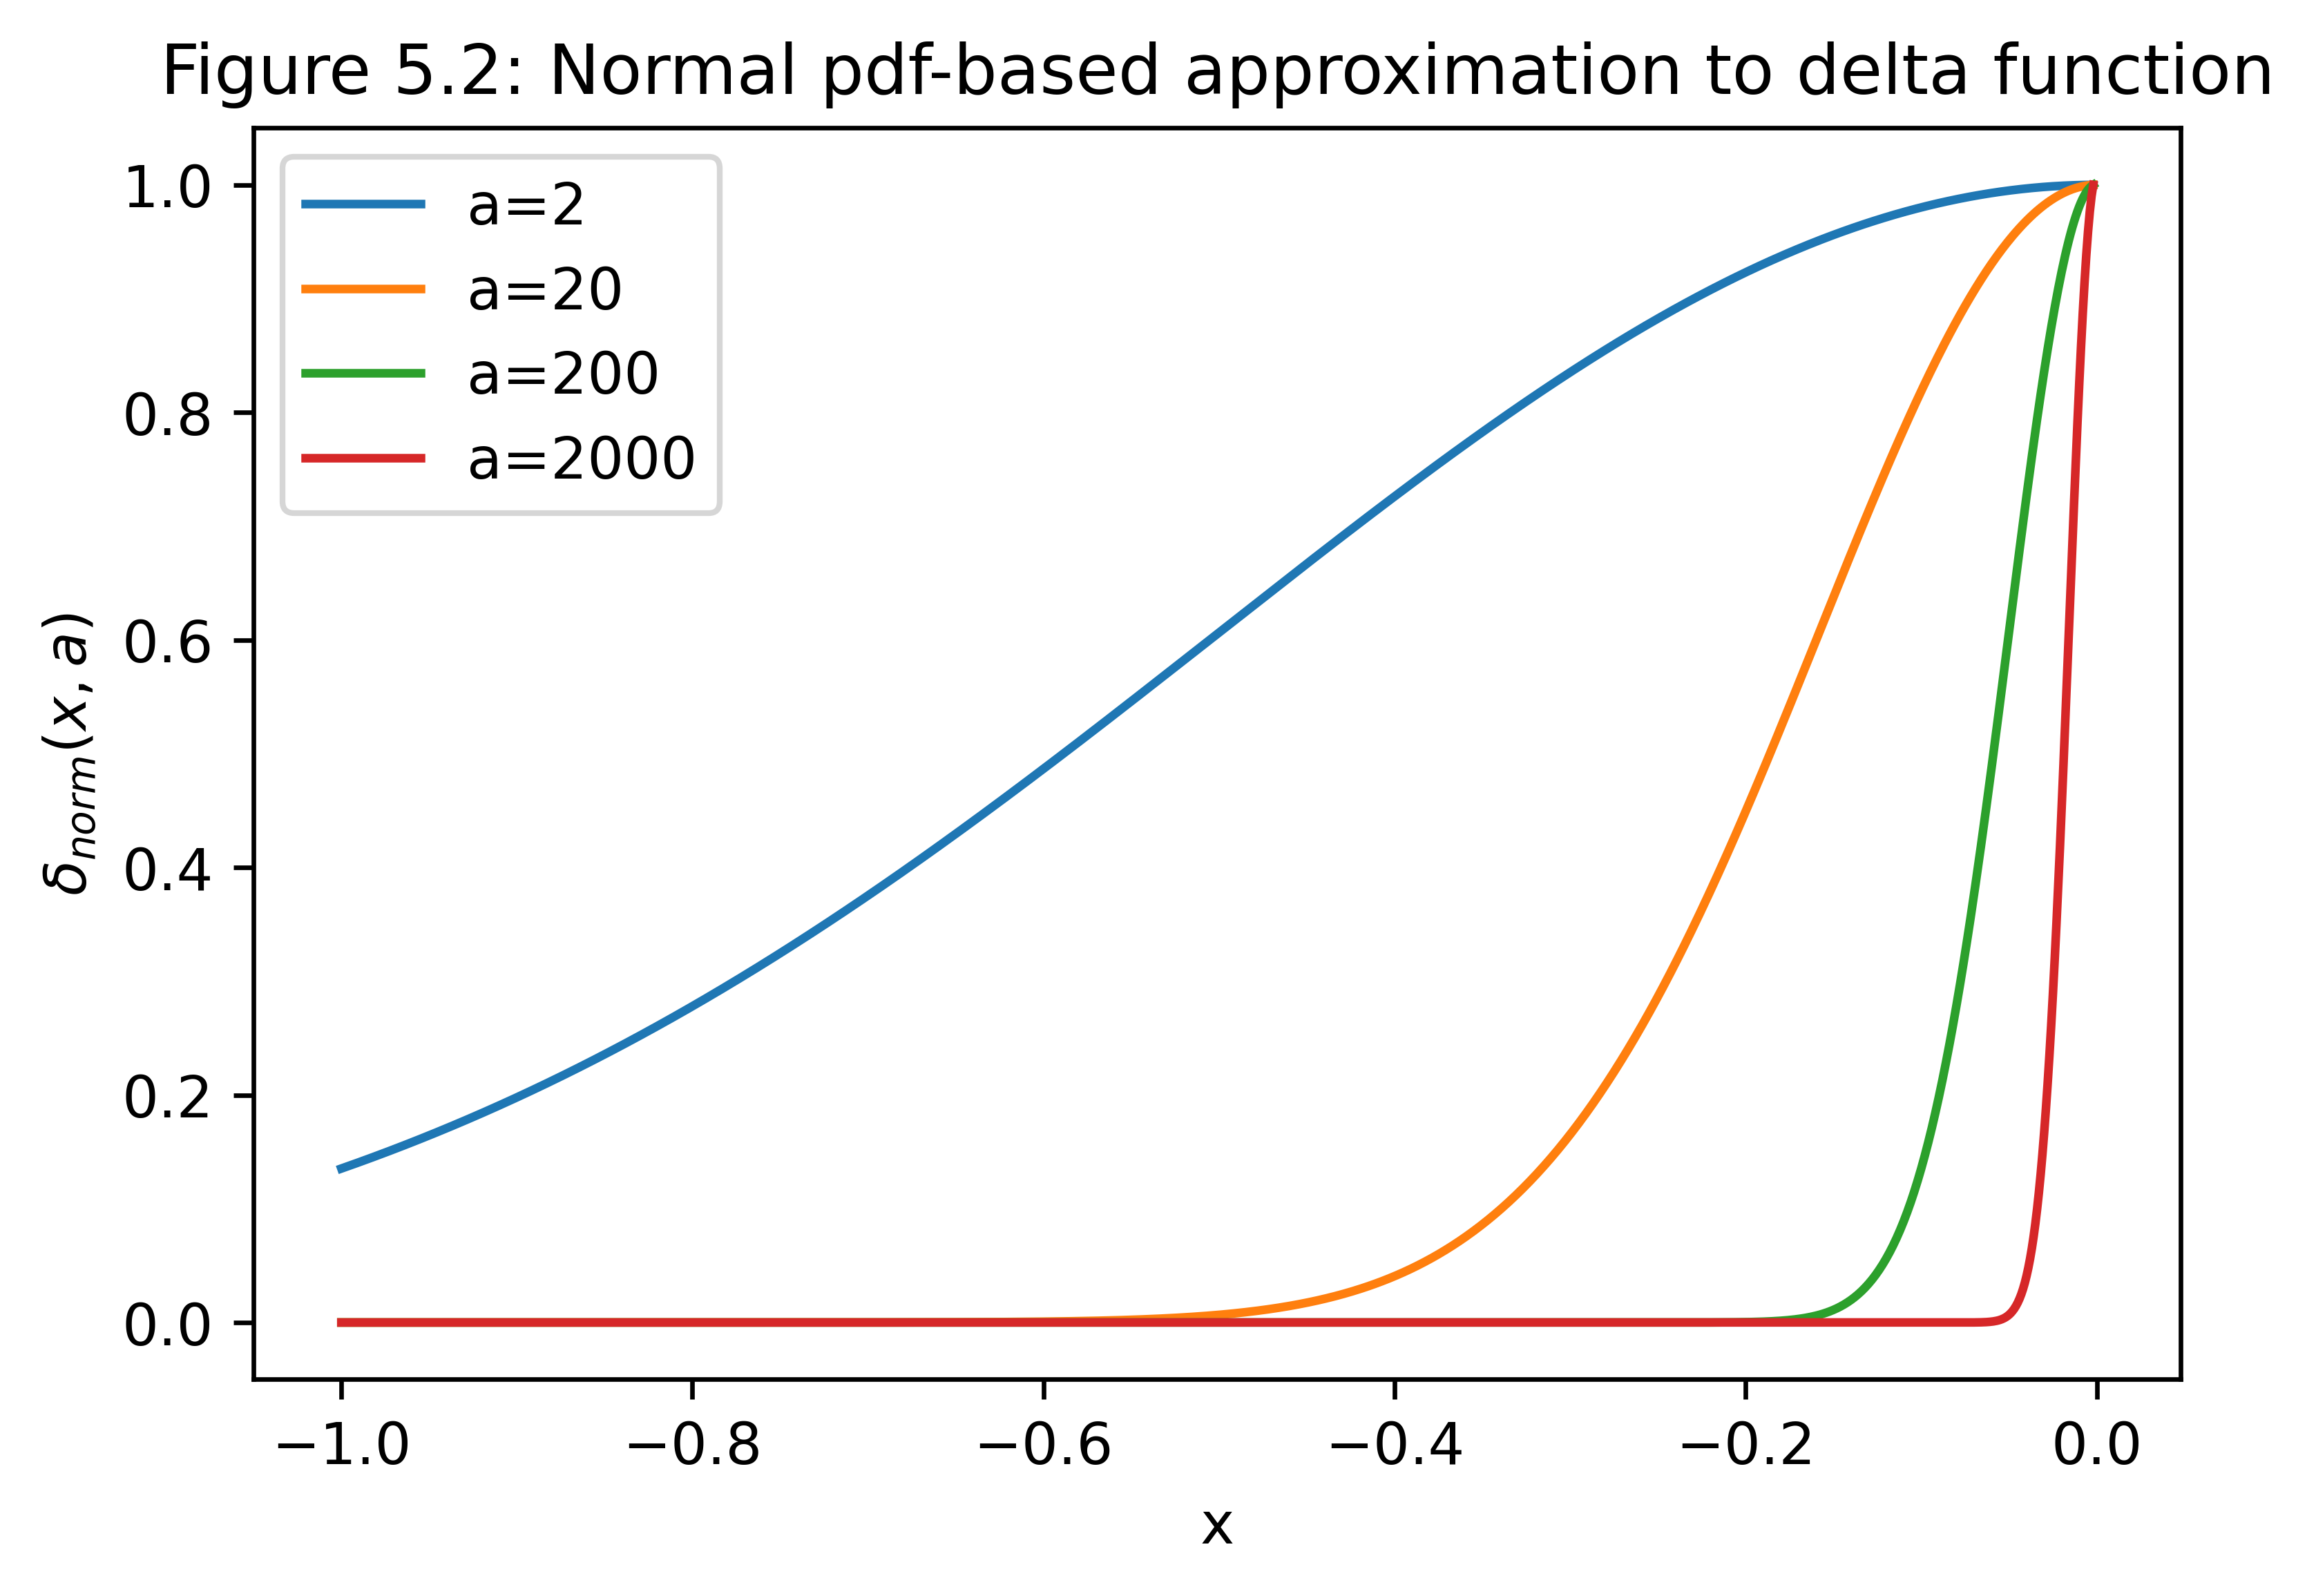

In [7]:
#Code Segment 5.6
#Illustrate smoothed delta function

def delta_norm(x,a):
    exparg=a*(x**2)
    return(a*np.exp(np.sign(x)*min(exparg,600)))

x=np.arange(-1.,-.001,.001)
for a in [2,20,200,2000]:
    scale=delta_norm(x[-1],a)
    y=[delta_norm(xx,a)/scale for xx in x]
    plt.plot(x,y,label="a="+str(a))

plt.title("Figure 5.2: Normal pdf-based approximation to delta function")
plt.xlabel("x")
plt.ylabel("$\delta_{norm}(x,a)$")
plt.legend()
plt.show();


## Code segment 5.7  
Data acquisition in Section 5.5

In [8]:
#Code Segment 5.7
import pandas as pd
import qrpm_funcs as qf
#Get 3 currencies until the end of
#previous year. Form sample covariance matrix

lastday=qf.LastYearEnd()
#Swiss franc, pound sterling, Japanese Yen
seriesnames=['DEXSZUS','DEXUSUK','DEXJPUS']
cdates,ratematrix=qf.GetFREDMatrix(seriesnames,enddate=lastday)
multipliers=[-1,1,-1]

lgdates,difflgs=qf.levels_to_log_returns(cdates,ratematrix,multipliers)

#Mean vector and covariance matrix are inputs to efficient frontier calculations
d=np.array(difflgs)
m=np.mean(d,axis=0)
c=np.cov(d.T)

## Code segment 5.8  
Barrier method first pass in Section 5.5

In [9]:
#Code Segment 5.8
#Do the optimization:
#minimize 1/2*w'Cw
#Subject to w'u=1
#           sum(wi^2)<= k
#where w is n-vector, u is unit n-vector

#Change to unconstrained barrier function where
# w=w0+Nx, x an n-1 vector.
#w0 is vector of all zeroes except for 1 in nth place
#N is nx(n-1) matrix with (n-1)x(n-1) identity matrix I(n-1) in first
#n-1 rows, -u(n-1) in last row (u(n-1) unit vector of size n-1)
#This gives function to be minimized over x:
# f(x)=omega*((1/2)*x'Fx+x'N'Cw0)-delta((u(n-1)'x-1)^2+x'x-k)

#Parameters
omega=1
epsilon=10**(-8)
k_parameter=.4

def delta_smooth(x):
    #Compute smoothed delta function
    a=2000.
    exparg=a*x**2
    return(a*np.exp(np.sign(x)*min(exparg,600.)))

def barrierfunc(x):
    global k_parameter, omega, c, epsilon, order_magnitude
    #Create N matrix
    n=len(x)+1
    nmatrix=np.vstack([np.identity(n-1),[-1]*(n-1)])
    #Create w0 vector
    w0=[0]*(n-1)+[1]
    #Create F matrix = N'CN
    fmatrix=(nmatrix.T @ c) @ nmatrix
    #First part of objective function 1/2*x'Fx
    objfunction=((x @ fmatrix) @ x)/2.
    #Second part of objective function w0'CNx
    objfunction+=(w0 @ (c @ nmatrix)) @ x
    #Make order of magnitude of this part about one - otherwise convergence is slow
    if order_magnitude == 0.:
        order_magnitude=np.abs(objfunction)
    objfunction*=(omega/order_magnitude)
    #Add in barrier
    u_times_x=sum(x)
    arg_delta = (u_times_x-1)**2 + (np.array(x) @ x) - k_parameter
    objfunction+=delta_smooth(arg_delta)
    return(objfunction)

def barriergrad(x):
    #Take gradient of function by differencing
    n=len(x)
    epsilon=10**(-8)/n
    bf_x=barrierfunc(x)

    gradvec=np.array([-bf_x]*n)
    for i in range(n):    #perturb each argument a little
        little_vec=np.zeros(n)
        little_vec[i]=epsilon
        gradvec[i]+=barrierfunc(np.add(x,little_vec))
    gradvec/=epsilon
    return(gradvec)

#Run initial step of barrier algorithm
i=0
xinit=[1/2,1/4]

order_magnitude=0.
x=gradientmethod([xinit],barrierfunc,barriergrad,True)

print("optimal x:",x[-1],1-sum(x[-1]))
print("iterations:",len(x)-1)
print("optimal objective:",barrierfunc(x[-1]))
print("gradient:",barriergrad(x[-1]))

#Pass on initial value for Barrier Algorithm iterations
xinit=x[-1]

Initial point: [0.5, 0.25]
Objective function at initial point: 572.0095937203789
Gradient at initial point: [2.86529901e+04 3.81987775e-02]
0  obj: 572.0095937203789  grad^2: 820993843.7308449
Delta from backtracking: 2.3864747990995235e-06
1  obj: 12.768453271095378  grad^2: 541530.171406485
Delta from backtracking: 7.533931929047496e-05
2  obj: -0.09288549996534301  grad^2: 1893.7752561177606
Delta from backtracking: 0.0017838067156503712
3  obj: -1.0548006422224558  grad^2: 8.426115631684159
Delta from backtracking: 0.0031712119389339932
4  obj: -1.0626734763408525  grad^2: 1.9414194970380667
Delta from backtracking: 0.0031712119389339932
5  obj: -1.0644352046464123  grad^2: 0.4707319028003282
Delta from backtracking: 0.0031712119389339932
6  obj: -1.0648886777913493  grad^2: 0.10756805039654642
Delta from backtracking: 0.0031712119389339932
7  obj: -1.064991786494625  grad^2: 0.02536154654144979
Delta from backtracking: 0.0031712119389339932
8  obj: -1.0650165870450932  grad^2: 0.

## Code segment 5.9  
Further iterations of barrier method in Section 5.5

In [10]:
#Code Segment 5.9
#Iterate the barrier method using starting
#value from previous code segment

alpha=10
iter_barrier=1
omega*=alpha

while True:

    x=gradientmethod([xinit],barrierfunc,barriergrad,False)
    
    print("barrier iteration ",iter_barrier)
    print("optimal x:",x[-1],1-sum(x[-1]))
    print("iterations:",len(x)-1)
    print("optimal objective:",barrierfunc(x[-1]))
    print("gradient:",barriergrad(x[-1]))

    if iter_barrier == 5:
        break   #Done
        
    #Keep going with a bigger omega
    #Use solution as initial guess for next pass
    xinit=x[-1]
    iter_barrier+=1
    omega*=alpha


barrier iteration  1
optimal x: [0.30180645 0.35144947] 0.34674408071735097
iterations: 15
optimal objective: -9.855995869092672
gradient: [-7.81597009e-06 -2.59348099e-05]
barrier iteration  2
optimal x: [0.26444077 0.37380701] 0.3617522197757057
iterations: 19
optimal objective: -101.73689303516731
gradient: [-3.41060513e-05 -3.41060513e-05]
barrier iteration  3
optimal x: [0.23193106 0.39393849] 0.3741304508731743
iterations: 23
optimal objective: -1013.5395228262457
gradient: [9.09494702e-05 0.00000000e+00]


barrier iteration  4
optimal x: [0.20030194 0.41405373] 0.38564433644387397
iterations: 501
optimal objective: -10108.315949575908
gradient: [0.00109139 0.0003638 ]
barrier iteration  5
optimal x: [0.15873136 0.44118304] 0.4000855929722289
iterations: 19
optimal objective: -101033.80923830453
gradient: [0. 0.]


## Code segment 5.10  
Long-only efficient frontier from cvxopt in Section 5.5

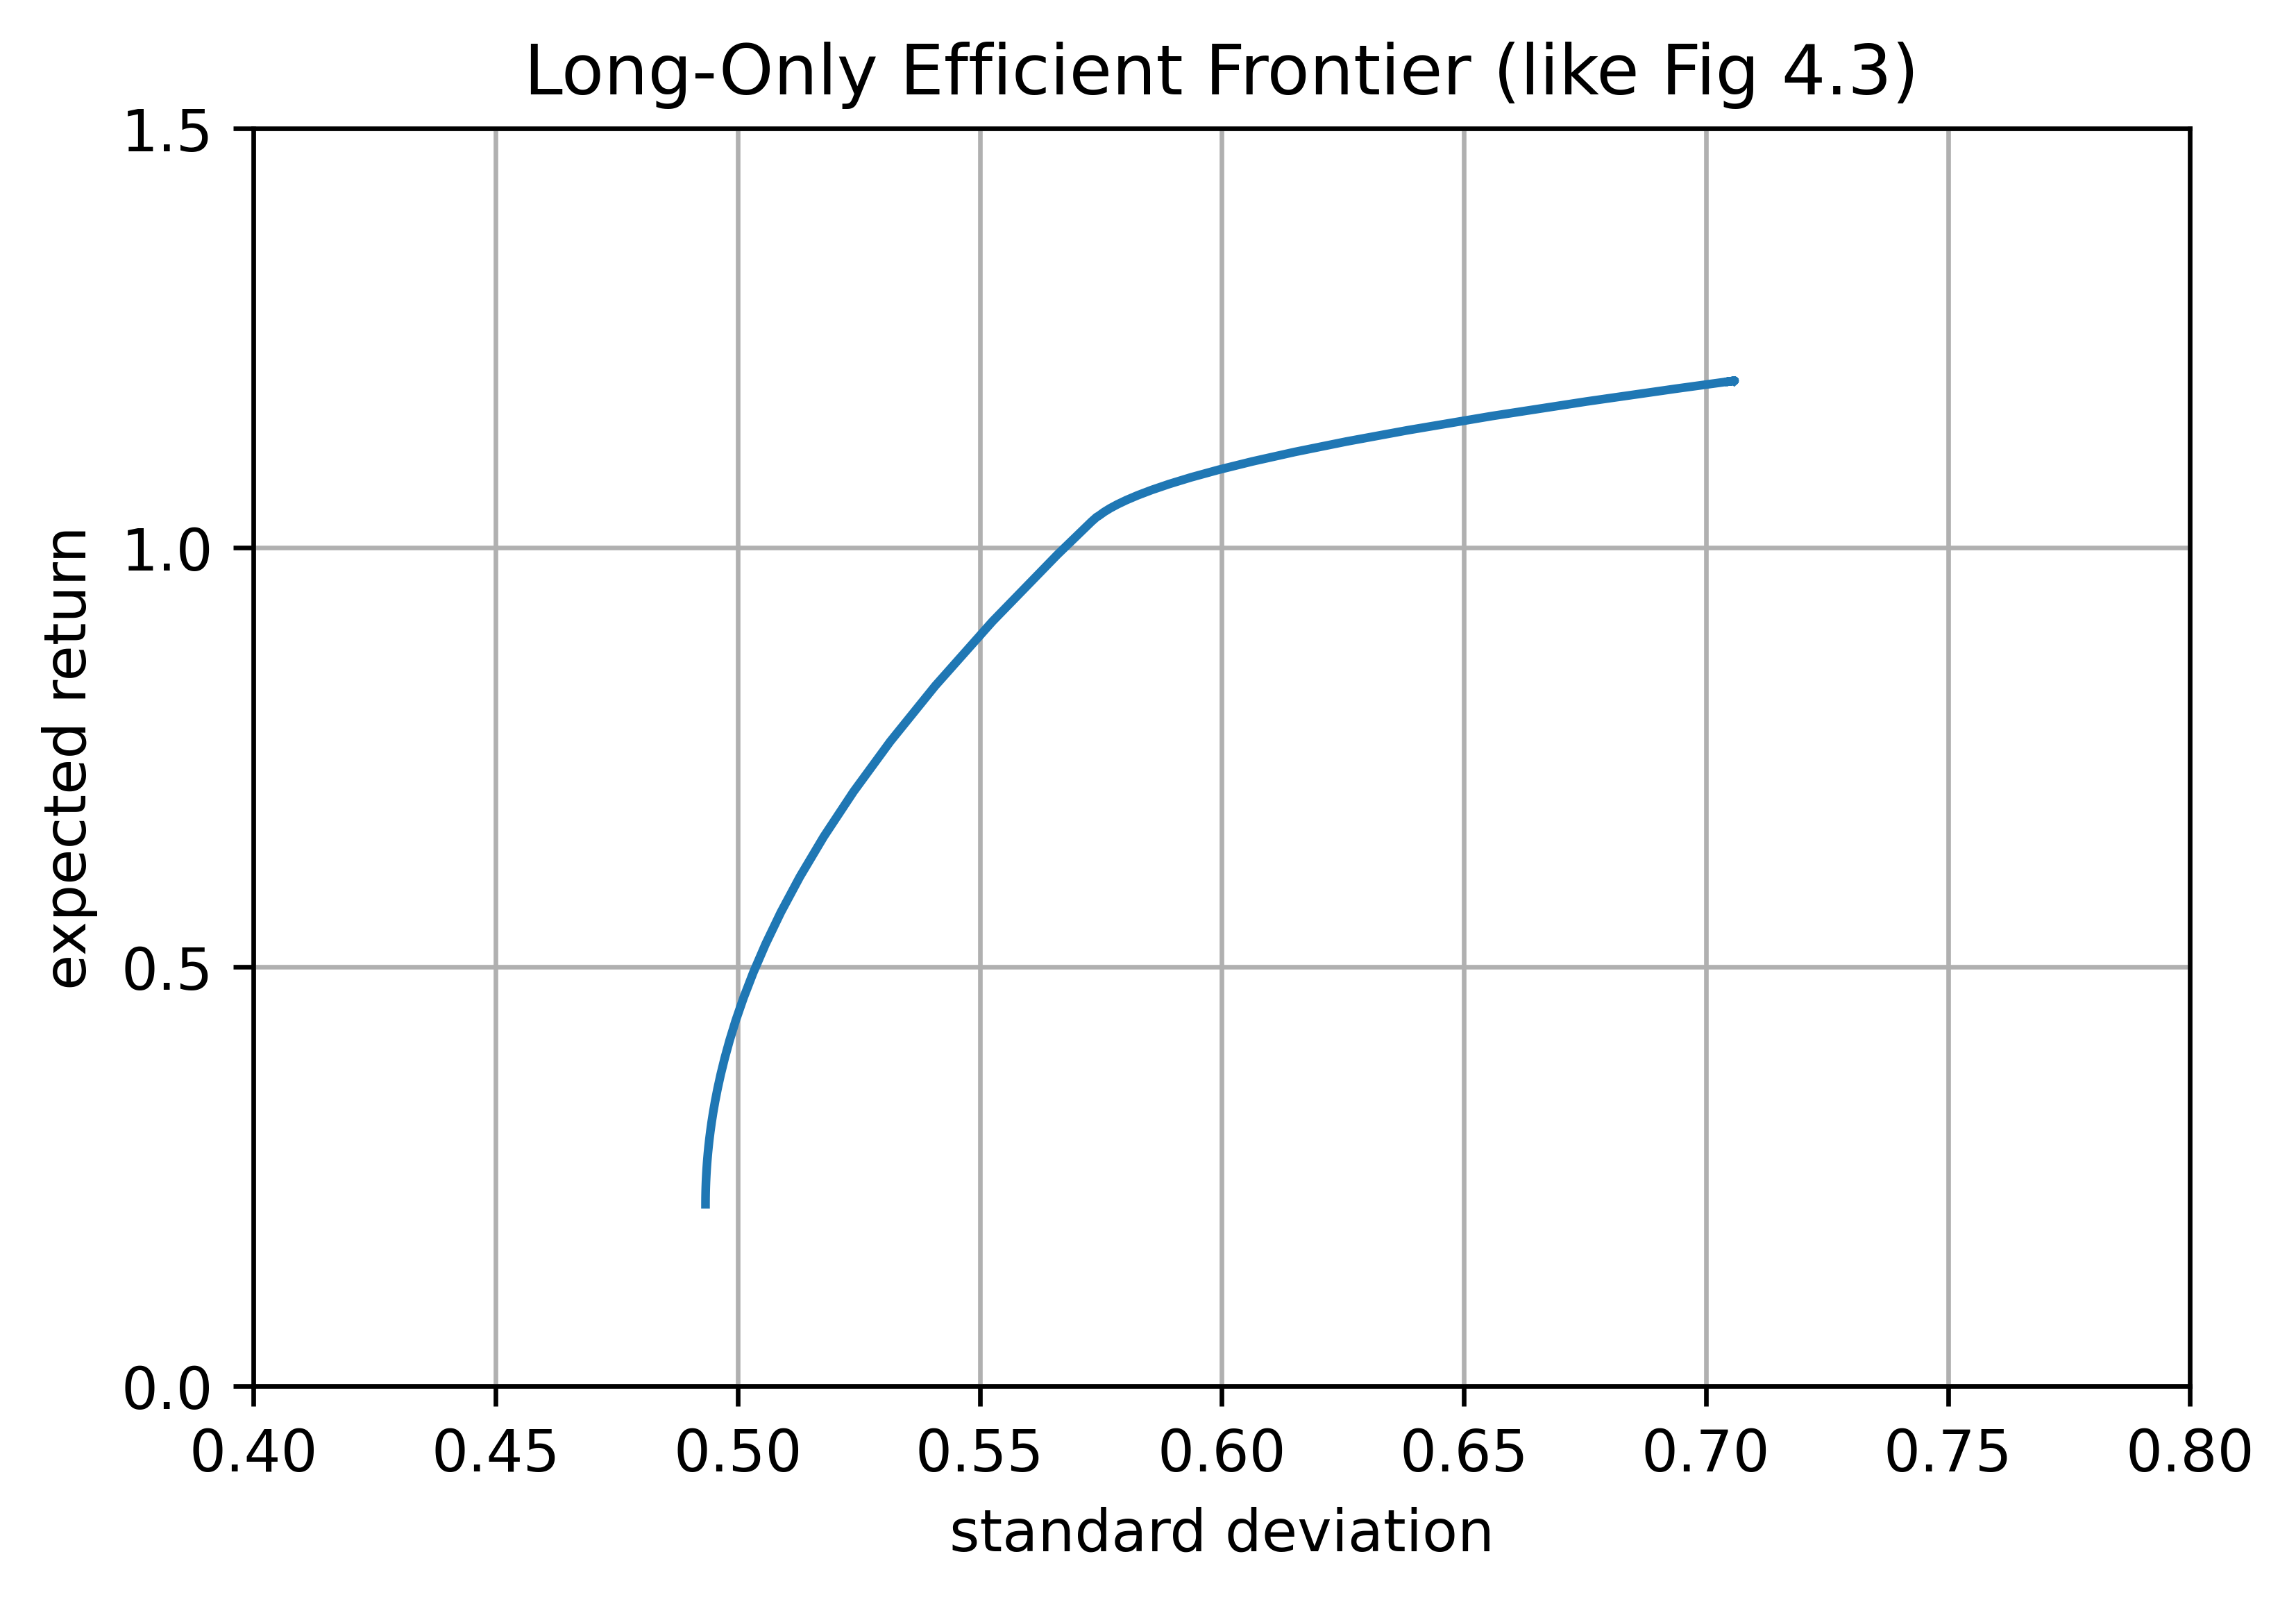

In [11]:
#Code Segment 5.10
# Modified from cvxopt - originally for Figure 4.12 in Boyd
# and Vandenberghe book. https://cvxopt.org/install/

from cvxopt import matrix
from cvxopt.blas import dot
from cvxopt.solvers import qp, options

n = 3
S = matrix(c)
pbar = matrix(m)

G = matrix(0.0, (n,n))
G[::n+1] = -1.0
h = matrix(0.0, (n,1))
A = matrix(1.0, (1,n))
b = matrix(1.0)

N = 100
mus = [ 10**(5.0*t/N-1.0) for t in range(N) ]
options['show_progress'] = False
xs = [ qp(mu*S, -pbar, G, h, A, b)['x'] for mu in mus ]

returns = [ dot(pbar,x) for x in xs ]
risks = [ np.sqrt(dot(x, S*x)) for x in xs ]

plt.plot(np.multiply(100.,risks), np.multiply(10000.,returns))
plt.xlabel('standard deviation')
plt.ylabel('expected return')
plt.axis([0.4, 0.8, 0, 1.5])
plt.grid()
plt.title('Long-Only Efficient Frontier (like Fig 4.3)')
plt.yticks([0.0, 0.5, 1.0, 1.5])
plt.show();